In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# load raw data
data_path = "/content/german.data"
df = pd.read_csv(data_path, delim_whitespace=True, header=None)

print("Shape:", df.shape)
df.head()

Shape: (1000, 21)


/tmp/ipython-input-19-1402285732.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_path, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [20]:
# assigning columns name as per data schema

columns = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
    'Savings', 'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex',
    'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
    'OtherInstallmentPlans', 'Housing', 'NumberCredits', 'Job',
    'PeopleLiable', 'Telephone', 'ForeignWorker', 'CreditRisk'
]

df.columns = columns
df.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,NumberCredits,Job,PeopleLiable,Telephone,ForeignWorker,CreditRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Status                 1000 non-null   object
 1   Duration               1000 non-null   int64 
 2   CreditHistory          1000 non-null   object
 3   Purpose                1000 non-null   object
 4   CreditAmount           1000 non-null   int64 
 5   Savings                1000 non-null   object
 6   EmploymentSince        1000 non-null   object
 7   InstallmentRate        1000 non-null   int64 
 8   PersonalStatusSex      1000 non-null   object
 9   OtherDebtors           1000 non-null   object
 10  ResidenceSince         1000 non-null   int64 
 11  Property               1000 non-null   object
 12  Age                    1000 non-null   int64 
 13  OtherInstallmentPlans  1000 non-null   object
 14  Housing                1000 non-null   object
 15  NumberCredits         

## EDA

In [22]:
# Checking summary stats

df.describe()

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,NumberCredits,PeopleLiable,CreditRisk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


<Axes: title={'center': 'Credit Risk Distribution'}, xlabel='CreditRisk'>

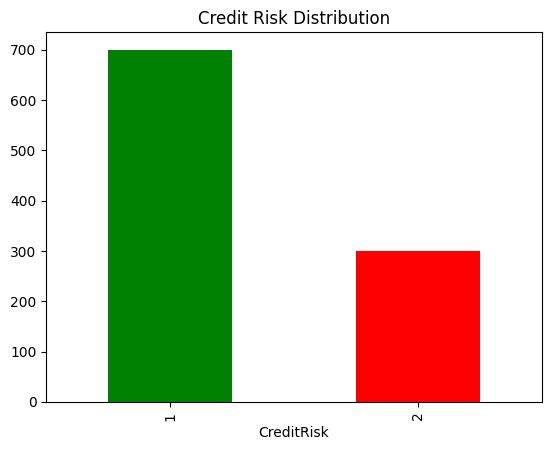

In [23]:
# Checking Credit Risk Distribution

df['CreditRisk'].value_counts().plot(kind='bar', color=['green','red'], title='Credit Risk Distribution')

In [24]:
 # Checking imbalance

 df['CreditRisk'].value_counts(normalize=True).mul(100).reset_index()

,CreditRisk,proportion
0,1,70.0
1,2,30.0


In [25]:
# UDF to look into any categorical column

def plot_default_rate_by_feature(col):
  temp = df.groupby(col)['CreditRisk'].value_counts(normalize=True).unstack().fillna(0)
  temp.columns = ['GoodCredit(%)', 'BadCredit(%)']
  temp['BadCredit(%)'] *= 100

  temp['BadCredit(%)'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title=f' Default Rate by {col}', color='tomato')
  plt.ylabel('Bad Credit Rate (%)')
  plt.show()

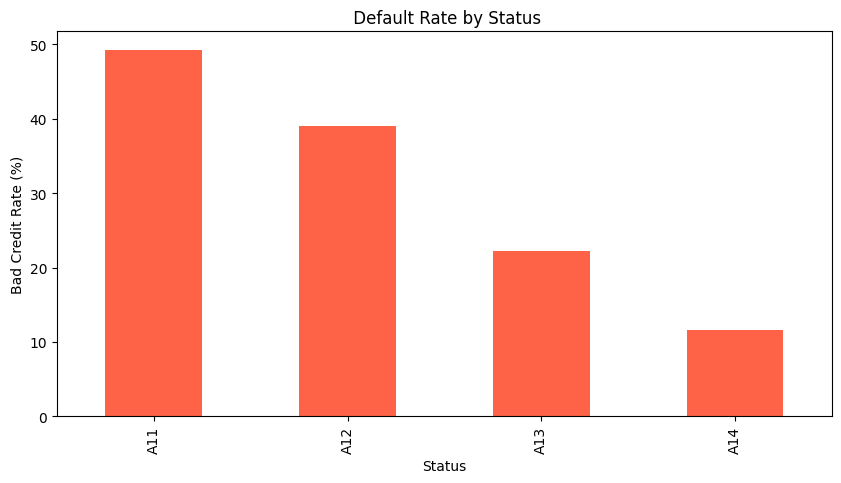

In [26]:
# plotting categorical feature insight

plot_default_rate_by_feature('Status')

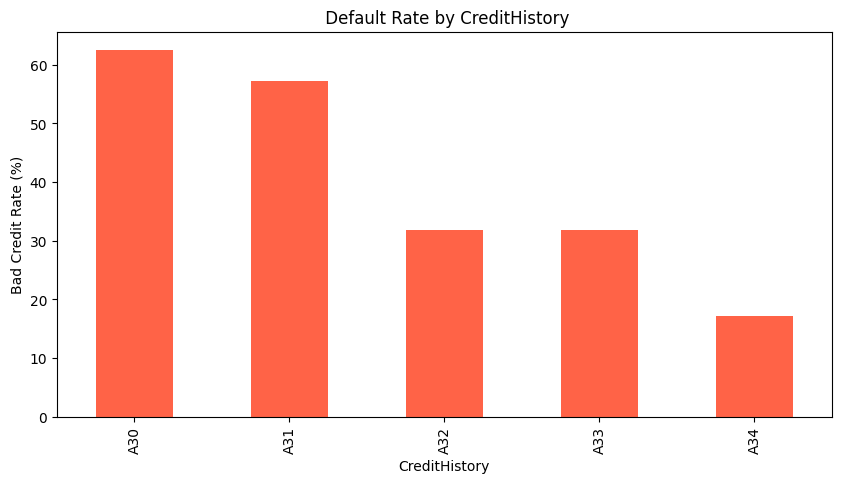

In [27]:
plot_default_rate_by_feature('CreditHistory')

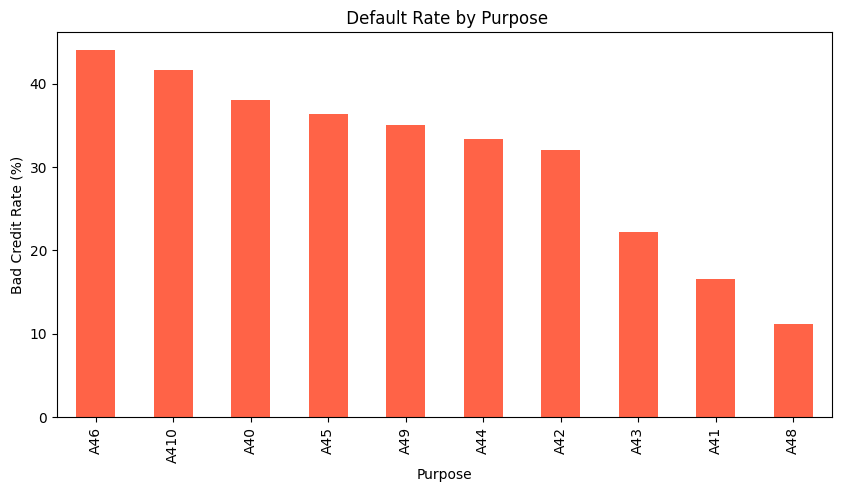

In [28]:
plot_default_rate_by_feature('Purpose')

In [30]:
# looking into raw counts of categorical variables

for col in df.select_dtypes(include='object').columns:
  print(f'\n{col}:\n', df[col].value_counts())


Status:
 Status
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

CreditHistory:
 CreditHistory
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

Purpose:
 Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

Savings:
 Savings
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

EmploymentSince:
 EmploymentSince
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64

PersonalStatusSex:
 PersonalStatusSex
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64

OtherDebtors:
 OtherDebtors
A101    907
A103     52
A102     41
Name: count, dtype: int64

Property:
 Property
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64

OtherInstallmentPlans:
 OtherInstallmentPlans
A143    814
A141    139
A142     47
Name: count, dtype: int64

Housing:
 Housi

# Data Transformation

In [33]:
# Seperating Categorical and Numerical Columns

# Categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Numerical Columns
num_cols = df.select_dtypes(include='int64').drop('CreditRisk', axis=1).columns.tolist()

print('Categorical Columns:\n', cat_cols)
print('Numerical_Columns:\n', num_cols)

Categorical Columns:
 ['Status', 'CreditHistory', 'Purpose', 'Savings', 'EmploymentSince', 'PersonalStatusSex', 'OtherDebtors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker']
Numerical_Columns:
 ['Duration', 'CreditAmount', 'InstallmentRate', 'ResidenceSince', 'Age', 'NumberCredits', 'PeopleLiable']


In [34]:
# Applying one-hot encoding

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Shape after encoding: ", df_encoded.shape)

Shape after encoding:  (1000, 49)


In [35]:
df_encoded.head()

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,NumberCredits,PeopleLiable,CreditRisk,Status_A12,Status_A13,...,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202
0,6,1169,4,4,67,2,1,1,False,False,...,False,False,True,True,False,False,True,False,True,False
1,48,5951,2,2,22,1,1,2,True,False,...,False,False,True,True,False,False,True,False,False,False
2,12,2096,2,3,49,1,2,1,False,False,...,False,False,True,True,False,True,False,False,False,False
3,42,7882,2,4,45,1,2,1,False,False,...,False,False,True,False,True,False,True,False,False,False
4,24,4870,3,4,53,2,2,2,False,False,...,True,False,True,False,True,False,True,False,False,False


In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Duration                    1000 non-null   int64
 1   CreditAmount                1000 non-null   int64
 2   InstallmentRate             1000 non-null   int64
 3   ResidenceSince              1000 non-null   int64
 4   Age                         1000 non-null   int64
 5   NumberCredits               1000 non-null   int64
 6   PeopleLiable                1000 non-null   int64
 7   CreditRisk                  1000 non-null   int64
 8   Status_A12                  1000 non-null   bool 
 9   Status_A13                  1000 non-null   bool 
 10  Status_A14                  1000 non-null   bool 
 11  CreditHistory_A31           1000 non-null   bool 
 12  CreditHistory_A32           1000 non-null   bool 
 13  CreditHistory_A33           1000 non-null   bool 
 14  CreditHis

# Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split

# Feature and Traget
X = df_encoded.drop('CreditRisk', axis=1)
y = df_encoded['CreditRisk']

# Split into 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y) # using strartify to maintain balance, as the class distribution is 700 good, and 300 bad


# Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logestic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Predict and Evaluate

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.87      0.85       140
           2       0.66      0.58      0.62        60

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.78      0.79      0.78       200



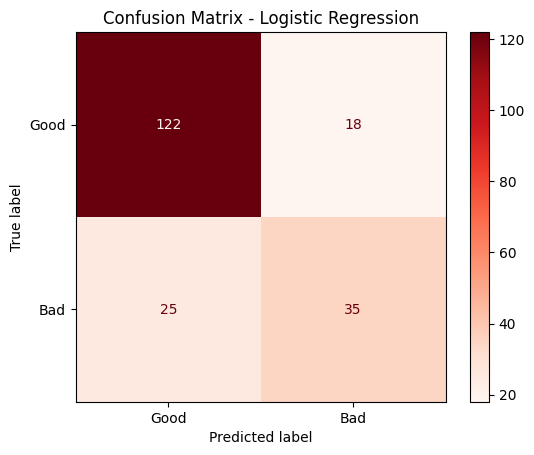

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
print("Classification Report:\n", classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])
disp.plot(cmap='Reds')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [44]:
# Checking accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 78.50%


# K-Means | Unsupervised Learning

In [45]:
# Reusing the same X_train_scaled and X_test_scaled, but for simplicity, combining them into a full dataset

X_scaled = scaler.fit_transform(X) #X is the full encoded feature set

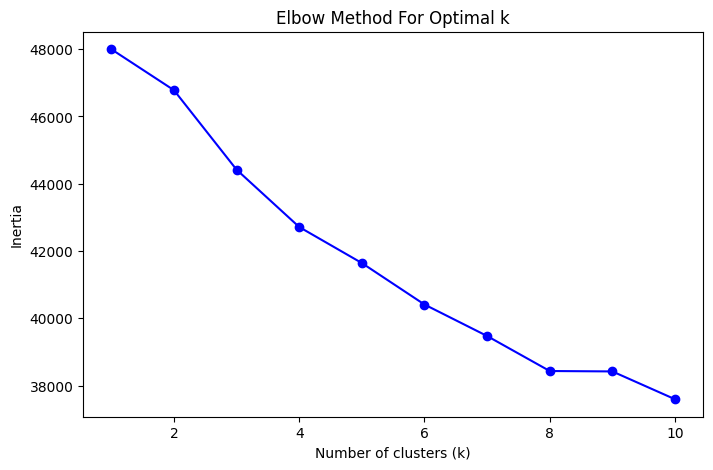

In [46]:
# Finding out optimal number of clusters using Elow Metod

from sklearn.cluster import KMeans

inertia = []
k_range = range(1,11)

for k in k_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_scaled)
  inertia.append(km.inertia_)

# plot elbow figure
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

In the above diagram, the steep change is around 2 to 3, approximately 2500 points. I will be taking k = 2.

In [49]:
# Fit KMeans with k = 2

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster label to the original dataframe
df['Cluster'] = clusters

# Visualizing Clusters using PCA

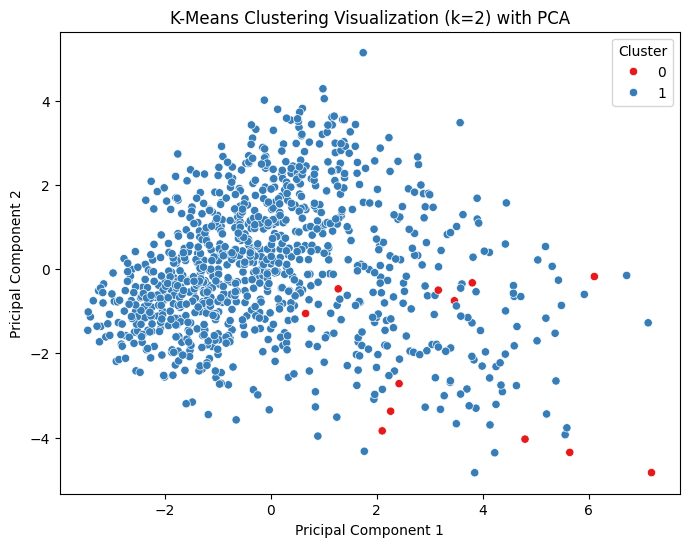

In [51]:
from sklearn.decomposition import PCA
import seaborn as sns

# PCA reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adding PCA components to the dataframe
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Visualization (k=2) with PCA')
plt.xlabel('Pricipal Component 1')
plt.ylabel('Pricipal Component 2')
plt.legend(title='Cluster')
plt.show()

# Compare Clusters vs Actual CreditRisk

In [52]:
# Compare the percentage distribution of credit risk within each cluster

cross_tab = pd.crosstab(df['Cluster'], df['CreditRisk'], normalize='index') * 100
cross_tab.columns = ['Good Credit (%)', 'Bad Credit (%)']
cross_tab


,Good Credit (%),Bad Credit (%)
Cluster,,
0,58.333333,41.666667
1,70.141700,29.858300
